# Task 1: Pacific Tide Gauge Data

---

This is Matt Pudig's notebook for MATH5271 class portfolio task 1. 

In this notebook, we load and analyse one year of hourly data from the _Pacific Sea Level Monitoring Project_ for the Pacific island nation, Tonga.

---

_"This task should include at least 3 original figures and approximately 1000 words of text. Your draft should include a solid attempt at parts 1 and 2 and at least a proposed outline of part 3. (The closer your draft is to complete the more useful your peer feedback will be)."_

---

In [2]:
# Import libraries

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd

Section 1.1
---
1.1 _"Download one year of hourly data for one location for the Pacific Sea Level Monitoring Project (http://www.bom.gov.au/oceanography/projects/spslcmp/data/index.shtml) and load these data into a platform such as Google Colaboratory. Briefly describe the source of these data (instruments, procedure, purpose etc) and display/describe the data graphically with one quality figure."_

---

---

The data to be used in this notebook are sourced from Australia Bureau of Meteorology's _Pacific Sea Level Monitoring Project_ (http://www.bom.gov.au/oceanography/projects/spslcmp/data/index.shtml). According to the Bureau's description of the project, "The primary goal of the project is to generate an accurate record of variance in long-term sea level for the Pacific region" (http://www.bom.gov.au/pacific/projects/pslm/). 


The data are sourced from permanent tide guage facilities at each participating country. Tonga's facility has been providing measurements from January 1993 to the present day, according to the metadata document associated with its tide guage (http://www.bom.gov.au/ntc/IDO50000/IDO50000_66600.pdf). The data provided include air and water temperature measured in degrees celcius; wind direction (in degrees True), speed and gusts measured in metres per second; barometric pressure measured in hectopascals; sea level as measured above "Tide Guage Zero" in metres; residual sea levels in metres (e.g. -0.014m indicates that the observed sea level is 0.014m below predicted sea level); and adjusted residuals in metres (e.g. -0.077m indicates that the observed sea level is 0.077m below predicted sea level, adjusted for "the static barometric pressure effect"). 

A quality assessment of tidal observations is performed using a Sutron 9000, which undergoes calibration every 18 months. A monthly validation process occurs on the previous month's data by the National Tidal Centre Data Analysis Department. Any missing or erroneous values (e.g., impossible values) are set to -9999 and must be removed by the data user.

---

In [3]:
# Load in the csv file from my public github repository: https://github.com/mpudig/MATH5271/tree/main/ClassPortfolio/Task1

tonja_url = 'https://raw.githubusercontent.com/mpudig/MATH5271/main/ClassPortfolio/Task1/tonga.csv'
df = pd.read_csv(tonja_url)

# Examine first 5 rows
df.head()

Date & UTC Time  Sea Level  Water Temperature  Air Temperature  \
0  01-Jan-2020 00:00      1.556               26.6             26.9   
1  01-Jan-2020 01:00      1.430               26.6             26.9   
2  01-Jan-2020 02:00      1.240               26.6             26.2   
3  01-Jan-2020 03:00      1.038               26.6             26.4   
4  01-Jan-2020 04:00      0.877               26.5             25.9   

   Barometric Pressure  Residuals  Adjusted Residuals  Wind Direction  \
0               1005.2      0.016              -0.062             185   
1               1005.4      0.019              -0.061             183   
2               1005.4      0.019              -0.058             167   
3               1004.9      0.018              -0.060             192   
4               1005.0      0.018              -0.065             182   

   Wind Gust  Wind Speed  Tonga  
0       15.1         7.4    NaN  
1       15.2         8.8    NaN  
2       15.8         8.0    NaN  
3       13.5         7.2    NaN  
4       13.5         7.8    NaN

In [4]:
# Convert the pandas dataframe to an xarray dataset for ease (i.e., I know how to use the latter better)

def convert_to_xr_dataset(pd_dataframe):
    # Make into xarray dataset
    ds = pd_dataframe.to_xarray() 
    # Remove the old, useless coordinate
    ds = ds.drop_vars('index')
    ds['index'] = np.linspace(2020, 2021, ds.index.size)
    # Rename coordinate
    ds = ds.rename({'index': 'time'})

    return ds

ds = convert_to_xr_dataset(df)

temp_air = ds['Air Temperature']
temp_water = ds['Water Temperature']
sea_level = ds['Sea Level']
time = ds.time.values

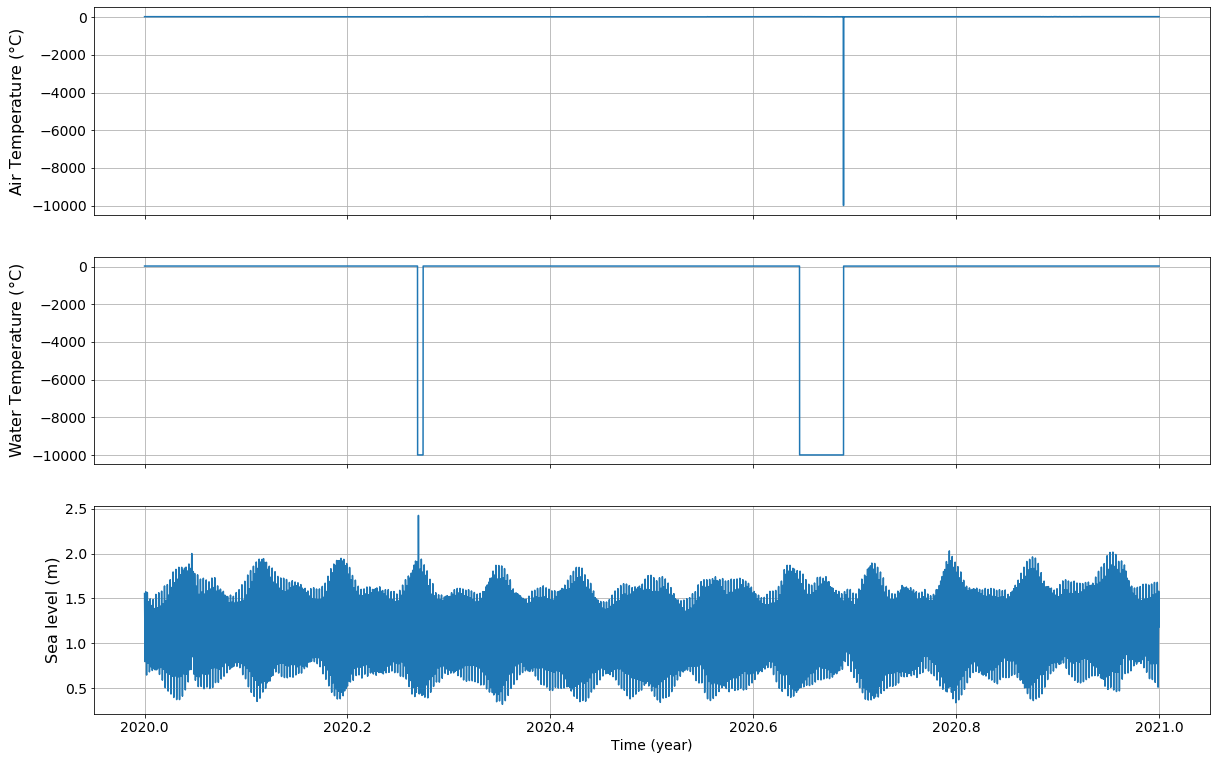

In [5]:
# Plot for an initial look at the data

fig, axs = plt.subplots(ncols=1, nrows=3, figsize=(20,13), sharex=True)
ax = axs[0]
temp_air.plot(ax=ax), ax.grid(), ax.set_xlabel(''), ax.set_ylabel('Air Temperature ($\degree$C)', fontsize=16), ax.tick_params(labelsize=14)

ax = axs[1]
temp_water.plot(ax=ax), ax.grid(), ax.set_xlabel(''), ax.set_ylabel('Water Temperature ($\degree$C)', fontsize=16), ax.tick_params(labelsize=14)

ax = axs[2]
sea_level.plot(ax=ax), ax.grid(), ax.set_xlabel('Time (year)', fontsize=14), ax.set_ylabel('Sea level (m)', fontsize=16), ax.tick_params(labelsize=14)

plt.show()

---
Clearly, there are some errors/missing values in the air temp and water temp data as there are values = -9999, which the metadata explain to correspond to errors/missing values. We remove these, and also make sure there are no other 'impossible values' (just for completeness).

Much nicer!


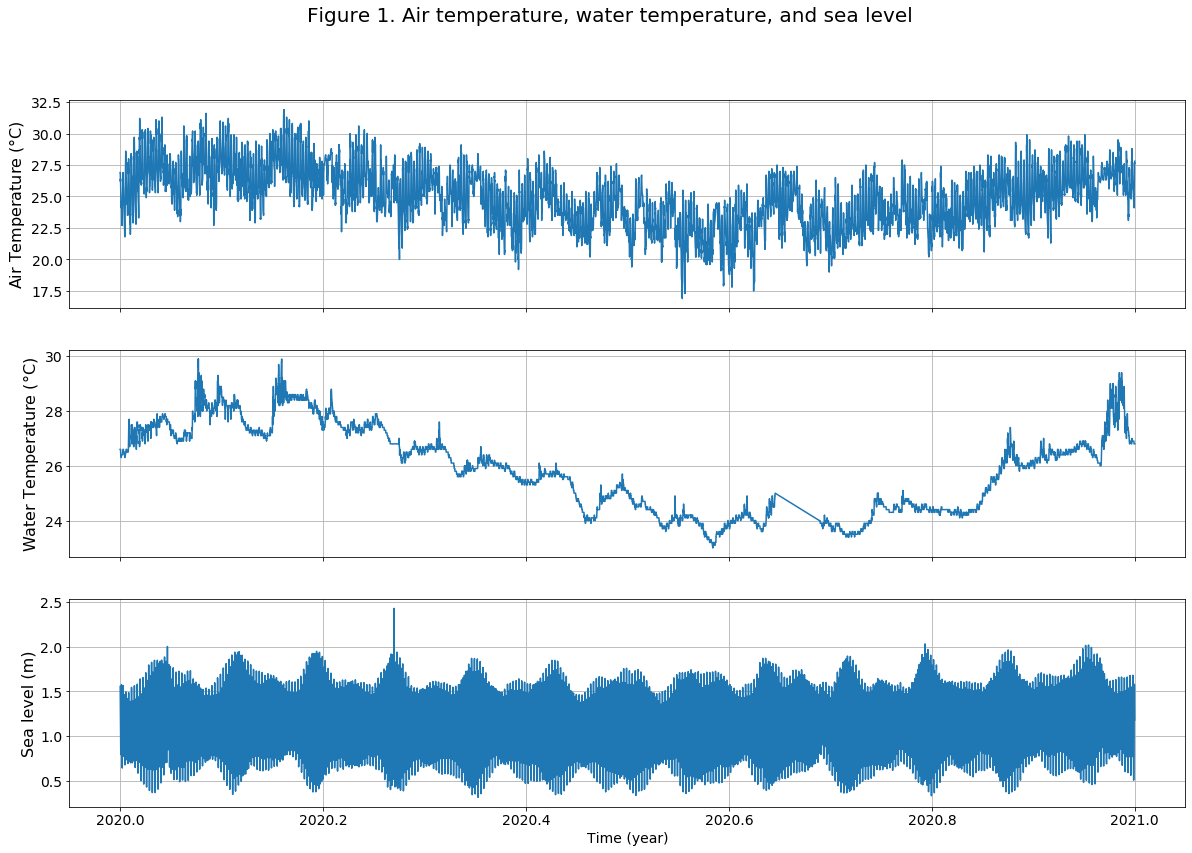

In [6]:
def remove_impossible_vals(array):
    # Returns array such that all values in array are >= -100 and <= 100
    
    return array[(array >= -100) & (array <= 100)] 

temp_air = remove_impossible_vals(temp_air)
temp_water = remove_impossible_vals(temp_water)
sea_level = remove_impossible_vals(sea_level)

# Plot again

fig, axs = plt.subplots(ncols=1, nrows=3, figsize=(20,13), sharex=True)
plt.suptitle('Figure 1. Air temperature, water temperature, and sea level', fontsize=20)
ax = axs[0]
temp_air.plot(ax=ax), ax.grid(), ax.set_xlabel(''), ax.set_ylabel('Air Temperature ($\degree$C)', fontsize=16), ax.tick_params(labelsize=14)

ax = axs[1]
temp_water.plot(ax=ax), ax.grid(), ax.set_xlabel(''), ax.set_ylabel('Water Temperature ($\degree$C)', fontsize=16), ax.tick_params(labelsize=14)

ax = axs[2]
sea_level.plot(ax=ax), ax.grid(), ax.set_xlabel('Time (year)', fontsize=14), ax.set_ylabel('Sea level (m)', fontsize=16), ax.tick_params(labelsize=14)

print('Much nicer!')

Section 1.2
---
1.2 _"Investigate these data using frequency domain analysis techniques. For example, fit a discrete number of harmonics to the air and water temperature data and compute the spectral density of the sea-level data. Explain the maths underpinning this analysis and explicitly code at least some of the diagnostics (e.g. write a code to determine Fourier coefficients)."_

---

In [7]:
# Subtract the mean in order to fit harmonics

temp_air_zeromean = temp_air - np.mean(temp_air)
temp_water_zeromean = temp_water - np.mean(temp_water)
sea_level_zeromean = sea_level - np.mean(sea_level)

---
We first compute the power spectrum for air temperature to see where the dominant frequencies are.

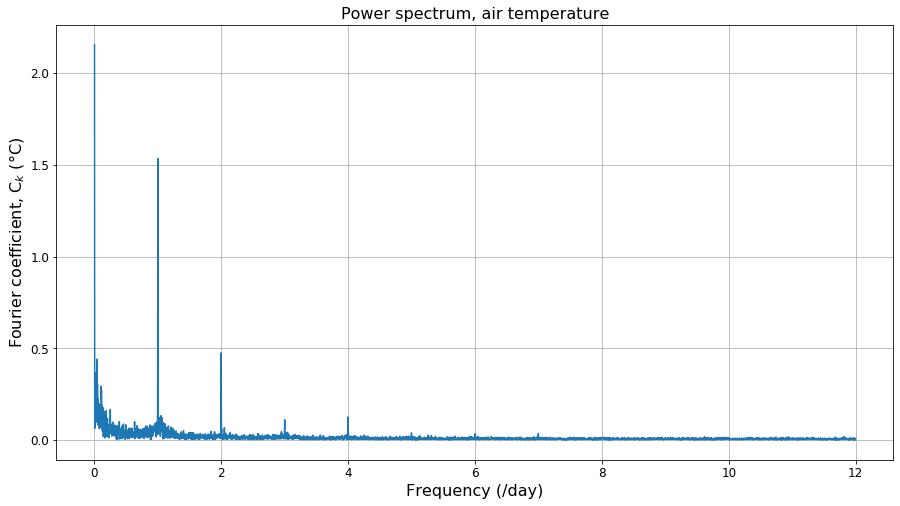

In [8]:
# Compute the power spectrum of air temp

data = temp_air_zeromean

n = data.size
spec = np.fft.rfft(data, n) / (n / 2)
fourier = abs(spec[1 : int(n / 2)])
R2_k = (n / 2) * fourier**2 / ((n - 1) * np.var(data, ddof=1).values)
freq_days = np.arange(1, int(n / 2)) / (n / 24)

plt.figure(figsize=(15,8))
plt.title('Power spectrum, air temperature', fontsize=16)
plt.plot(freq_days, fourier)
plt.ylabel('Fourier coefficient, C$_k$ ($\degree$C)', fontsize=16)
plt.xlabel('Frequency (/day)', fontsize = 16)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.grid()
plt.show()

---
We would expect the dominant frequencies in the air temperature data to correspond to a yearly period (seasonality) and a daily period (diurnal cycle). This is confirmed by the spikes in its power spectrum at frequencies 0.00273(day)$^{-1}$ and 1.00011(day)$^{-1}$, which in terms of periods (reciprocal of frequencies) correspond to 365.96 days and 1.0 day, respectively. (Note that the yearly period is almost 366 days since 2020 was a leap year.)

There is also some power at the frequency 2.00022day$^{-1}$ (i.e., approximately a period of 12 hours). I am yet to figure out whether this is an aliased lower frequency, or a 'real' signal.

For now, though, we will fit two harmonics corresponding to the daily and yearly periods.

---

Any data series conisting of _n_ points can be represented exactly, meaning that a function can be found that passes through each of the points, by adding together a series of n/2 harmonic functions (Wilks, 2011): $$y_t = \overline{y} + \sum^{n/2}_{k=1}\bigg\{A_k \cos{\bigg[\frac{2\pi k}{n}t\bigg] + B_k \sin{\bigg[\frac{2\pi k}{n}t\bigg]}}\bigg\},$$ where $\overline{y}$ is the sample mean of the time series $y_t$. The cofficients, $A_k$ and $B_k$, are often written, by leveraging complex notation, as one "Fourier coefficient" $$C_k = |A_k + i B_k|,$$ where $i$ is the imaginary unit and $|\cdot|$ is the modulus.

Because of the orthogonality of sine and cosine functions, we can write the real and imaginary part of the Fourier coefficients as a summation over all time points, representing a "discrete Fourier transform", as $$A_k = \frac{2}{n} \sum^n_{t=1} y_t \cos{\bigg(\frac{2\pi k}{n}t\bigg)}$$ and $$B_k = \frac{2}{n} \sum^n_{t=1} y_t \sin{\bigg(\frac{2\pi k}{n}t\bigg)}.$$ 

This is the mathematics underlying the Fourier transform performed above using numpy's fft (Fast Fourier Transform) package, except the latter uses a so-called Fast Fourier Transform algorithm which is much more computationally efficient than finding $A_k$ and $B_k$ using the above sommation formulae and subsequently calculating $C_k$.

Nevertheless, below, we utilise these summation formulae explicitly to compute the harmonics corresponding to daily and yearly periods in the air temperature data.

In [9]:
# Explicitly calculate the Fourier coefficients (using summation formulae) corresponding to daily and yearly periods

def cos_func(k):
    return np.cos(2 * np.pi * k * np.arange(0, n) / n)

def sin_func(k):
    return np.sin(2 * np.pi * k * np.arange(0, n) / n)

def fourier_coefficient(data, k):
    # k = Fourier harmonic
    
    n = data.shape[0]
    A_k = (2 / n) * np.sum(data.values * cos_func(k))
    B_k = (2 / n) * np.sum(data.values * sin_func(k))
    
    return (A_k, B_k)

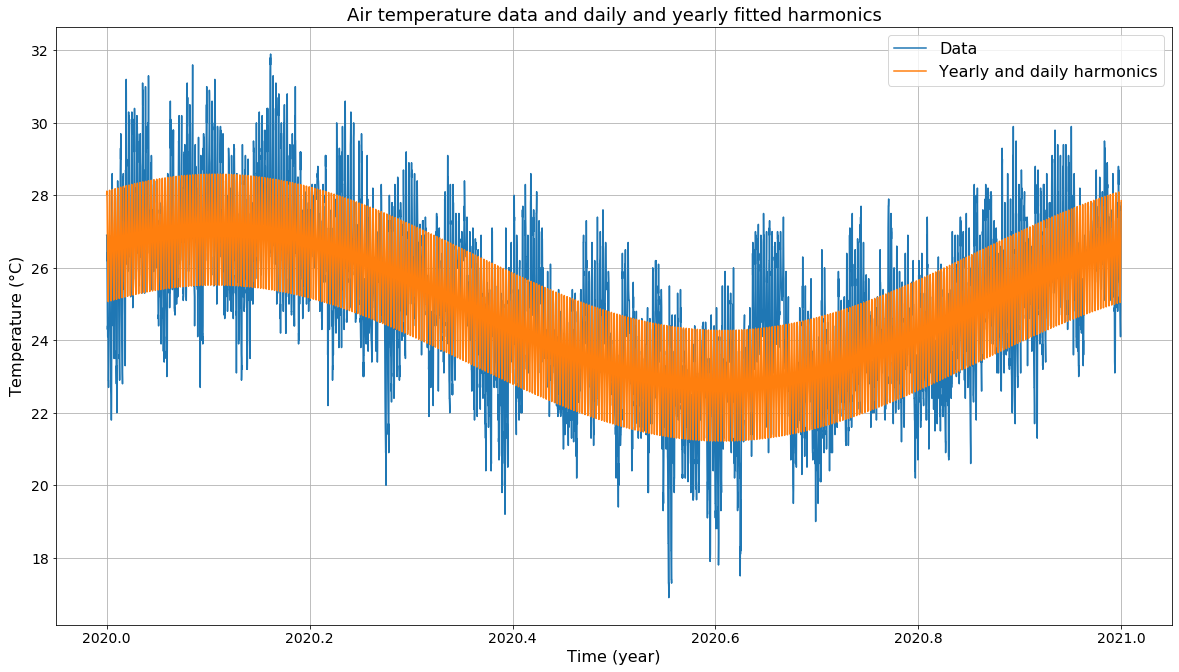

In [10]:
A_1, B_1 = fourier_coefficient(data, 1) # Yearly harmonic Fourier coefficients
A_366, B_366 = fourier_coefficient(data, 366) # Daily harmonic Fourier coefficients

plt.figure(figsize=(20,11))

temp_air_fit = np.mean(temp_air).values + A_1 * cos_func(1) + B_1 * sin_func(1) + A_366 * cos_func(366) + B_366 * sin_func(366)
plt.plot(time[:-1], temp_air, label='Data')
plt.plot(time[:-1], temp_air_fit, label='Yearly and daily harmonics')
plt.title('Air temperature data and daily and yearly fitted harmonics', fontsize=18)
plt.xlabel('Time (year)', fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel('Temperature ($\degree$C)', fontsize=16)
plt.yticks(fontsize=14)
plt.grid()
plt.legend(fontsize=16)

---
We now do the same for water temperature: compute the power spectrum for water temperature, and fit a a number of discrete harmonics to the data.

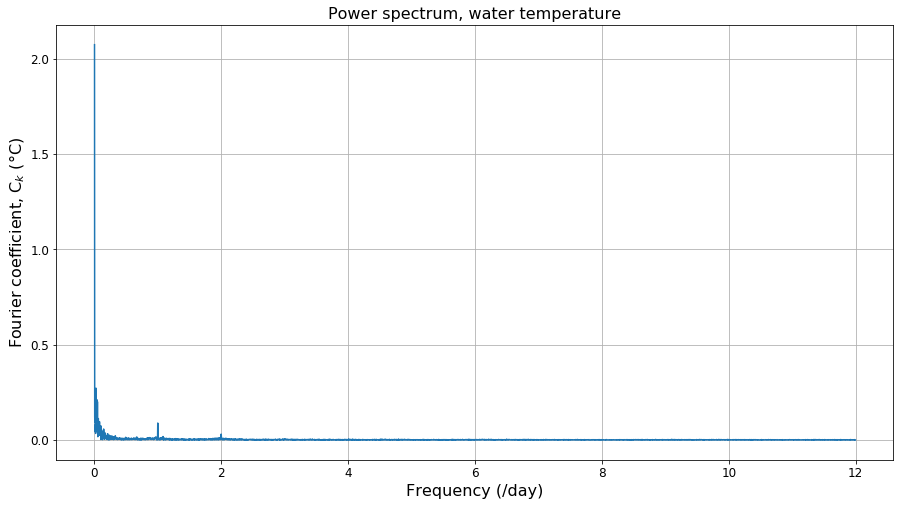

In [11]:
# Compute the power spectrum of air temp

data = temp_water_zeromean

n = data.size
spec = np.fft.rfft(data, n) / (n / 2)
fourier = abs(spec[1 : int(n / 2)])
R2_k = (n / 2) * fourier**2 / ((n - 1) * np.var(data, ddof=1).values)
freq_days = np.arange(1, int(n / 2)) / (n / 24)

plt.figure(figsize=(15,8))
plt.title('Power spectrum, water temperature', fontsize=16)
plt.plot(freq_days, fourier)
plt.ylabel('Fourier coefficient, C$_k$ ($\degree$C)', fontsize=16)
# plt.plot(freq_days, R2_k)
# plt.ylabel('Normalised spectral density, R$^2_k$', fontsize=16)
plt.xlabel('Frequency (/day)', fontsize = 16)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.grid()
plt.show()

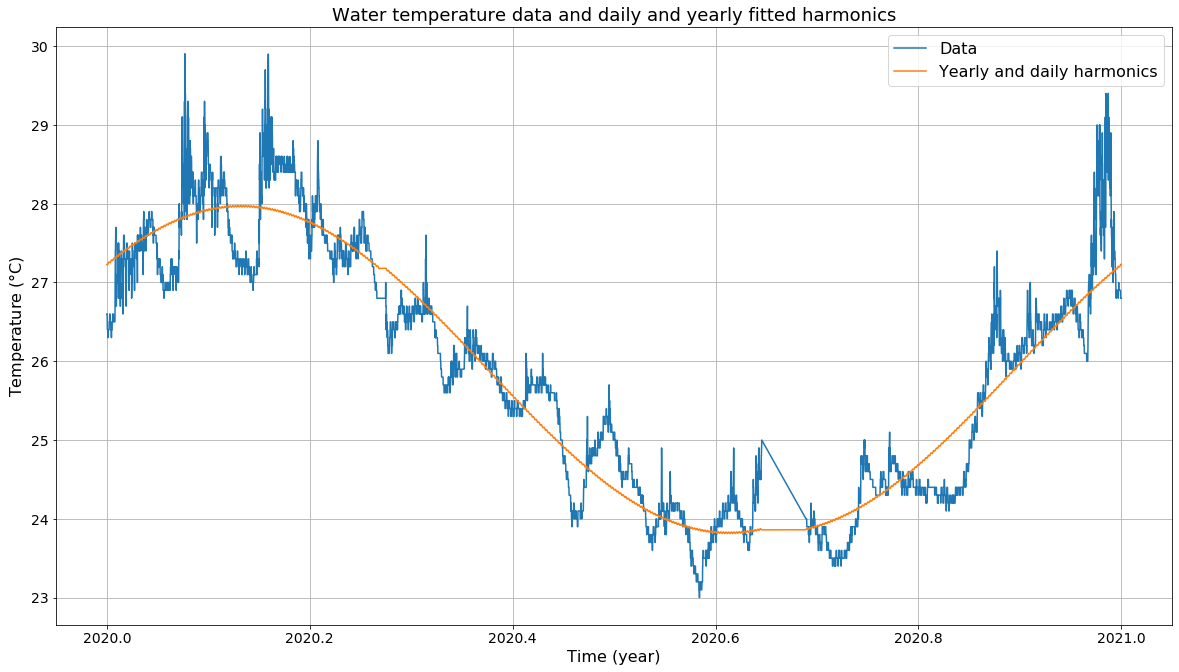

In [12]:
A_1, B_1 = fourier_coefficient(data, 1) # Yearly harmonic Fourier coefficients
A_366, B_366 = fourier_coefficient(data, 366) # Daily harmonic Fourier coefficients

plt.figure(figsize=(20,11))

temp_water_fit = np.mean(temp_water).values + A_1 * cos_func(1) + B_1 * sin_func(1) \
+ A_366 * cos_func(366) + B_366 * sin_func(366)
plt.plot(temp_water.time.values, temp_water, label='Data')
plt.plot(temp_water.time.values, temp_water_fit, label='Yearly and daily harmonics')
plt.title('Water temperature data and daily and yearly fitted harmonics', fontsize=18)
plt.xlabel('Time (year)', fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel('Temperature ($\degree$C)', fontsize=16)
plt.yticks(fontsize=14)
plt.grid()
plt.legend(fontsize=16)

---
Now, we look at the power spectrum for sea level. The lower panel zooms in on the frequencies were there seems to be the largest power in the spectrum.

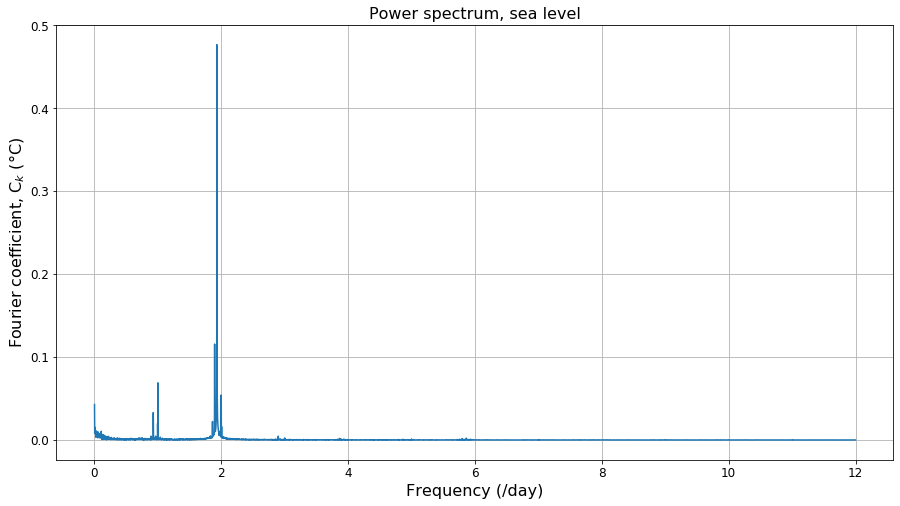

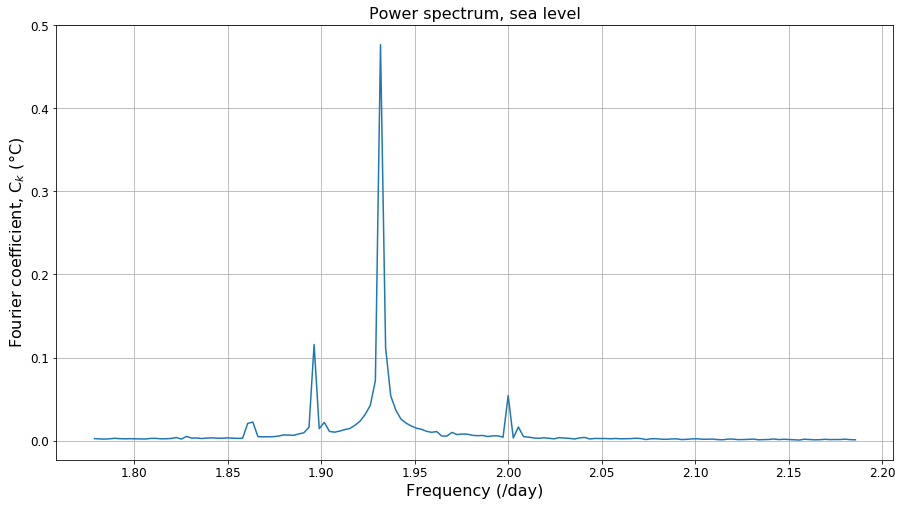

In [192]:
# Compute the power spectrum of the sea level data

data = sea_level_zeromean

n = data.size
spec = np.fft.rfft(data, n) / (n / 2)
fourier = abs(spec[1 : int(n / 2)])
R2_k = (n / 2) * fourier**2 / ((n - 1) * np.var(data, ddof=1).values)
freq_days = np.arange(1, int(n / 2)) / (n/24)

plt.figure(figsize=(15,8))
plt.title('Power spectrum, sea level', fontsize=16)
plt.plot(freq_days, fourier)
plt.ylabel('Fourier coefficient, C$_k$ ($\degree$C)', fontsize=16)
plt.xlabel('Frequency (/day)', fontsize = 16)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.grid()
plt.show()

plt.figure(figsize=(15,8))
plt.title('Power spectrum, sea level', fontsize=16)
plt.plot(freq_days[650:800], fourier[650:800])
plt.ylabel('Fourier coefficient, C$_k$ ($\degree$C)', fontsize=16)
plt.xlabel('Frequency (/day)', fontsize = 16)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.grid()
plt.show()

In [189]:
n/np.arange(1, int(n / 2))

array([8.78400000e+03, 4.39200000e+03, 2.92800000e+03, ...,
       2.00136705e+00, 2.00091116e+00, 2.00045548e+00])

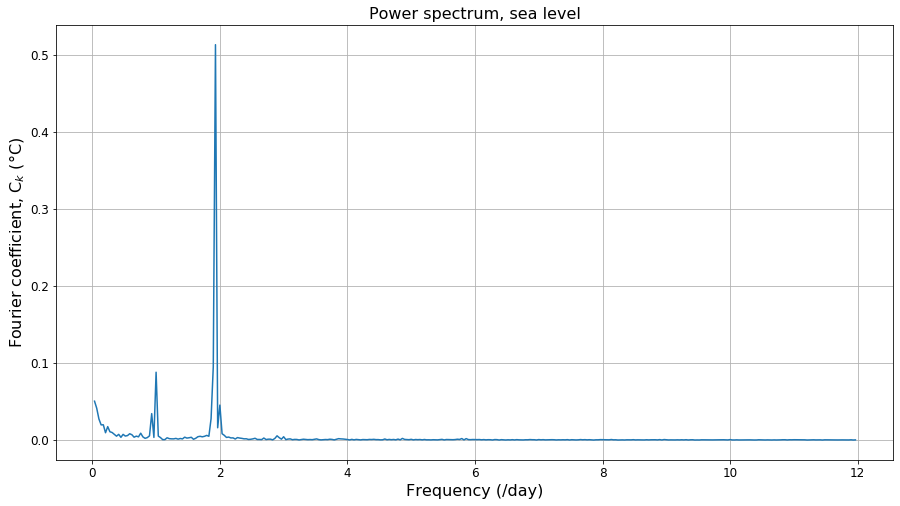

In [183]:
data = (sea_level-np.mean(sea_level))[:24*29]

n = data.size
spec = np.fft.rfft(data, n) / (n / 2)
fourier = abs(spec[1 : int(n / 2)])
R2_k = (n / 2) * fourier**2 / ((n - 1) * np.var(data, ddof=1).values)
freq_days = np.arange(1, int(n / 2)) / (n/24)

plt.figure(figsize=(15,8))
plt.title('Power spectrum, sea level', fontsize=16)
plt.plot(freq_days, fourier)
plt.ylabel('Fourier coefficient, C$_k$ ($\degree$C)', fontsize=16)
plt.xlabel('Frequency (/day)', fontsize = 16)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.grid()
plt.show()

In [13]:
print(f'Thus, the dominant frequency from the spectrum corresponds to a period of \
{1/((np.arange(1, int(n / 2)) / (n/24))[np.argmax(abs(spec[1 : int(n / 2)]))]) * 24} hrs.')

Thus, the dominant frequency from the spectrum corresponds to a period of 12.424328147100425 hrs.


This frequency agrees well the principal lunar semi-diurnal harmonic (M2), whose period is typically given as 12.42hrs.

We can also plot a normalised spectral density. By normalised spectral density, we refer to the $R^2_k$ coefficient of determination for each harmonic using the following formula (Wilks, 2011): $$R^2_k = \frac{(n/2) C^2_k}{(n-1) s^2_y},$$ where $n$ is the length of the time series, $C_k$ is the Fourier coefficient, and $s^2_y$ is the sample variance of the time series. This allows us to examine the proportion of the variance of $y_t$ accounted for by each harmonic.

---

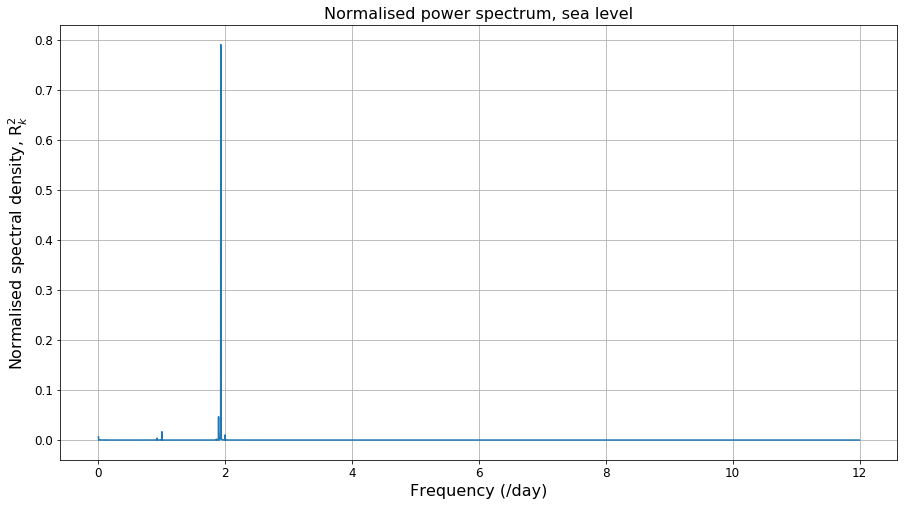

In [14]:
plt.figure(figsize=(15,8))
plt.title('Normalised power spectrum, sea level', fontsize=16)
plt.plot(freq_days, R2_k)
plt.ylabel('Normalised spectral density, R$^2_k$', fontsize=16)
plt.xlabel('Frequency (/day)', fontsize = 16)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.grid()
plt.show()

In [15]:
print(f'Thus, the dominant period of \
{np.round(1/((np.arange(1, int(n / 2)) / (n/24))[np.argmax(abs(spec[1 : int(n / 2)]))]) * 24,2)} hrs \
accounts for approximately {np.round(np.max(R2_k),2)*100}% of the variance in the sea level data.')

Thus, the dominant period of 12.42 hrs accounts for approximately 79.0% of the variance in the sea level data.


Section 1.3
---
1.3 _"Interpret these analyses in terms of putative physical processes such as the seasonal cycle and the tides. Discuss what aspects of the results are real physical signals and which could indicate aliasing or similar issues related to the data set."_

---

There are several items I plan to investigate further:

1) Looking at the periodogram for the air temperature (several cells above), there seem to be further clear spikes at frequencies 2(day)$^{-1}$, 3(day)$^{-1}$ and 4(day)$^{-1}$. I'm yet to look into whether these are potentially aliased frequencies.

2) The water temperature data has some peculiar quirks, which I have not yet looked into, and have not yet worked out whether they are of concern. For instance, in the cell below I have plotted the water temperature data as given over the first week of 2020 (and the air temperarture for comparison). First, notice that the water temperature is often measured as the same temperature over several subsequent hours, whereas the air temperature rarely stays the same between subsequent hours. This may be a result of the resolution of the water temperature observations, unable to observe smaller flucations, which should probably be noted. Second, there are large jumps in the water temperature at several points in the full year's data (e.g., by about 3Â°C at the end of the first month); see Figure 1. I'm yet to look into whether this is a plausible change (marine heatwaves?). Last, visually from the raw water temperature data I can see a persistent oscillation with a period of several weeks. This doesn't seem to show up in the power spectrum. Why? 

3) I need to look more in-depth into the tidal data in general. For instance, I don't seem to be picking up the monthly lunar period (approximately 27.6 days) in the power spectrum. There are clearly a number of harmonics interacting that I need to look into further, as well as the possibility of aliasing (e.g., perhaps the smaller spikes around the 2(day)$^{-1}$ frequency).

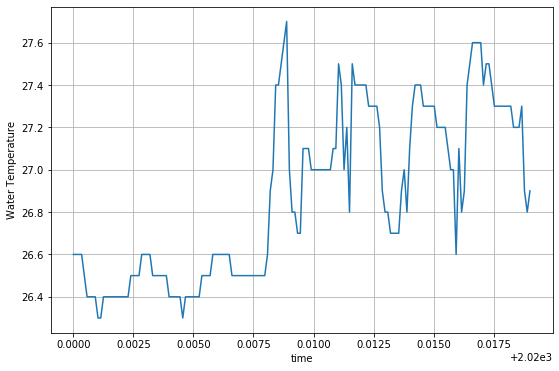

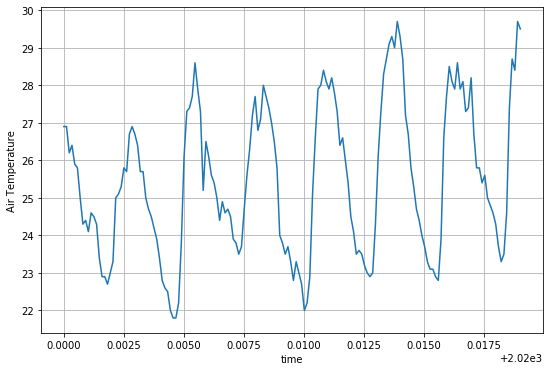

In [16]:
plt.figure(figsize=(9,6))
temp_water[0:24*7].plot()
plt.grid()
plt.figure(figsize=(9,6))
temp_air[0:24*7].plot()
plt.grid()

References
---
[1] Wilks, D. S. (2011). Statistical methods in the atmospheric sciences (Vol. 100). Academic press.